In [1]:

!pwd
#/tf/capstone2/src

/tf/capstone2/data/app/breast-cancer-cnn/notebooks


In [2]:
cd ..

/tf/capstone2/data/app/breast-cancer-cnn


In [3]:
cd src/

/tf/capstone2/data/app/breast-cancer-cnn/src


In [4]:
from image_pipeline import *
from image_convolv import *
from bc_plotting import *
from bc import *

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [8]:
# Goal is to isolate holdout data and load pre-build model to run evaluate methods
# and get plots looking nice


In [6]:
#root_dir = '../data/BreaKHis_v1/histology_slides/breast'
#image_size = (153, 234, 3) # (456, 700, 3) # ( 153, 234, 3)

#ip = read_images(root_dir, ['200X'])
#ip.resize(shape = image_size)
brief_mode = False
ip = run_pipeline(brief_mode=False) # sets ip images_filename_list, and images_list

first image shape (460, 700, 3)
first names entry SOB_B_A-14-22549AB-200-001.png
images_list should have list of 2013 patients x images, filenames of shape 460 
first image shape (460, 700, 3)
images_filename_list should have list of 2013 patients * images
first names entry SOB_B_A-14-22549AB-200-001.png
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}


In [7]:
# Turns data into arrays
ip.vectorize() # sets ip features and tumor_class_vector

features shape (2013, 153, 234, 3)
attribs (dict) len 2013
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '002', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '003', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '004', 'image_size': (460, 700, 3)}
tumor_class vector num malig 1390 out of 2013 samples
tumor_class vector looks like [0 0 0 ... 1 1 1]
number of distinct patients: 81


In [8]:
# shuffle! 
X, y, groups, filename_list = shuffle_all(ip.features, ip.tumor_class_vector, ip.group_list, ip.images_filename_list)

In [44]:
num_diffs = test_integrities(y, groups, filename_list, ip.images_attributes)

len and y: (2013,) [1 0 1 ... 0 0 1]


In [10]:
num_diffs

0

In [45]:
# check out data
ip.images_attributes

{'SOB_B_A-14-22549AB-200-001.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '001',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-002.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '002',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-003.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '003',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-004.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '004',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-005.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': 

In [12]:
# Get holdout data

In [12]:
X_train, X_holdout, y_train, y_holdout, groups_tr, groups_val, filename_tr, filename_val  = \
    train_holdouts_split_by_group(X, y, \
    groups=groups, filename_list=filename_list, holdout_pct=0.1)


in train_holdouts_split_by_group, shapes of X and y, groups, and fns (2013, 153, 234, 3) (2013,) 2013 2013
groups: ['5695', '21998CD', '16456', '20636', '16188', '22549CD', '17915', '15570', '25197', '14015', '21978AB', '15792', '14134E', '2773', '19440', '17915', '3411F', '16716', '18650', '21998AB', '9461', '21998AB', '2523', '16196', '2523', '15570', '13413', '17901', '16184CD', '12312', '3909', '15570', '19854C', '29960CD', '9133', '9146', '9146', '4364', '15687B', '15570C', '15704', '2773', '16716', '2773', '3909', '16184', '12465', '19979C', '23222AB', '16184']
(1769, 153, 234, 3) (244, 153, 234, 3)
1769 244
sample holdout filenames: ['SOB_B_A-14-22549CD-200-020.png', 'SOB_B_F-14-25197-200-049.png', 'SOB_M_LC-14-16196-200-017.png', 'SOB_M_DC-14-4364-200-012.png', 'SOB_B_TA-14-16184-200-016.png', 'SOB_B_TA-14-16184-200-004.png', 'SOB_M_DC-14-5694-200-013.png', 'SOB_B_A-14-22549CD-200-018.png', 'SOB_M_DC-14-13993-200-004.png', 'SOB_B_TA-14-16184-200-022.png', 'SOB_B_A-14-22549CD-20

In [106]:
X_holdout.shape
#X_holdout[:5]

(244, 153, 234, 3)

In [30]:
X_train, X_val, X_holdout, y_train, y_val, y_holdout, groups_tr, groups_val, groups_hold, \
filename_tr, filename_val, filename_hold = image_train_val_hold_split(ip)

----------check after shuffle----------------------
len and y: (2013,) [1 1 1 ... 1 1 0]
-----------after shuffle, are 0 diffs---------------------
shuffled!
in train_holdouts_split_by_group, shapes of X and y, groups, and fns (2013, 153, 234, 3) (2013,) 2013 2013
groups: ['9461', '12204', '9461', '15792', '19854C', '22549CD', '23060CD', '19440', '25197', '21998CD', '14946', '16601', '9133', '18842', '3909', '16456', '15570', '16336', '21998AB', '10147', '2980', '29315EF', '16196', '22549AB', '16456', '17614', '23222AB', '29960CD', '20636', '21998AB', '29315EF', '15570', '14015', '22549AB', '18650', '29960AB', '5287', '9133', '22549CD', '15687B', '9461', '11951', '12465', '15792', '23060CD', '16184', '13412', '21998AB', '16196', '16184']
(1769, 153, 234, 3) (244, 153, 234, 3)
1769 244
sample holdout filenames: ['SOB_B_A-14-22549CD-200-014.png', 'SOB_B_F-14-25197-200-032.png', 'SOB_M_LC-14-16196-200-010.png', 'SOB_B_A-14-22549CD-200-021.png', 'SOB_B_TA-14-16184-200-031.png', 'SOB_M_LC-1

In [47]:
df_hold = get_dataframe(y_holdout, groups_hold, filename_hold, ip.images_attributes)
print('got df_hold {}'.format(df_hold.iloc[0]))

got df_hold index                                            0
file                SOB_B_A-14-22549CD-200-014.png
group                                      22549CD
y                                                0
tumor_class                                      B
biopsy_procedure                               SOB
tumor_type                                       A
year                                            14
slide_id                                   22549CD
mag                                            200
seq                                            014
image_size                           (460, 700, 3)
Name: 0, dtype: object


In [32]:
df_hold

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size
0,0,SOB_B_A-14-22549CD-200-014.png,22549CD,0,B,SOB,A,14,22549CD,200,014,"(460, 700, 3)"
1,1,SOB_B_F-14-25197-200-032.png,25197,0,B,SOB,F,14,25197,200,032,"(460, 700, 3)"
2,2,SOB_M_LC-14-16196-200-010.png,16196,1,M,SOB,LC,14,16196,200,010,"(460, 700, 3)"
3,3,SOB_B_A-14-22549CD-200-021.png,22549CD,0,B,SOB,A,14,22549CD,200,021,"(460, 700, 3)"
4,4,SOB_B_TA-14-16184-200-031.png,16184,0,B,SOB,TA,14,16184,200,031,"(460, 700, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,SOB_M_DC-14-15572-200-016.png,15572,1,M,SOB,DC,14,15572,200,016,"(460, 700, 3)"
240,240,SOB_M_LC-14-16196-200-004.png,16196,1,M,SOB,LC,14,16196,200,004,"(460, 700, 3)"
241,241,SOB_M_DC-14-13993-200-031.png,13993,1,M,SOB,DC,14,13993,200,031,"(460, 700, 3)"
242,242,SOB_M_DC-14-13993-200-022.png,13993,1,M,SOB,DC,14,13993,200,022,"(460, 700, 3)"


In [54]:
df_results = evaluate_model(cnn, X_holdout, y_holdout, df_hold)

score from model.evaluate [4.8222171517669175, 0.7008197]
predict results 
[[1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.5311686e-11 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       127
           1       0.62      1.00      0.76       117

    accuracy                           0.70       244
   macro avg       0.81      0.71      0.68       244
weighted avg       0.82      0.7

In [34]:
df_results

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
0,0,SOB_B_A-14-22549CD-200-014.png,22549CD,0,B,SOB,A,14,22549CD,200,014,"(460, 700, 3)",1.0,0.0,1.0,0
1,1,SOB_B_F-14-25197-200-032.png,25197,0,B,SOB,F,14,25197,200,032,"(460, 700, 3)",0.0,1.0,1.0,1
2,2,SOB_M_LC-14-16196-200-010.png,16196,1,M,SOB,LC,14,16196,200,010,"(460, 700, 3)",0.0,1.0,1.0,1
3,3,SOB_B_A-14-22549CD-200-021.png,22549CD,0,B,SOB,A,14,22549CD,200,021,"(460, 700, 3)",0.0,1.0,1.0,1
4,4,SOB_B_TA-14-16184-200-031.png,16184,0,B,SOB,TA,14,16184,200,031,"(460, 700, 3)",1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,SOB_M_DC-14-15572-200-016.png,15572,1,M,SOB,DC,14,15572,200,016,"(460, 700, 3)",0.0,1.0,1.0,1
240,240,SOB_M_LC-14-16196-200-004.png,16196,1,M,SOB,LC,14,16196,200,004,"(460, 700, 3)",0.0,1.0,1.0,1
241,241,SOB_M_DC-14-13993-200-031.png,13993,1,M,SOB,DC,14,13993,200,031,"(460, 700, 3)",0.0,1.0,1.0,1
242,242,SOB_M_DC-14-13993-200-022.png,13993,1,M,SOB,DC,14,13993,200,022,"(460, 700, 3)",0.0,1.0,1.0,1


In [70]:
df_grp = df_results.groupby(['tumor_class', 'tumor_type', 'y_hat']).agg({ "slide_id": pd.Series.nunique, "group": pd.Series.nunique, "file": pd.Series.nunique})
df_grp

slide_id  group  file
tumor_class tumor_type y_hat                       
B           A          0             1      1    17
                       1             1      1    14
            F          0             1      1    26
                       1             2      2    35
            TA         0             1      1    11
                       1             1      1    24
M           DC         1             4      4    99
            LC         1             1      1    18

In [98]:
# Some True Negatives index 0, 4, 15, 47
#df_results.query('y_hat != 1 & y == 0 ')

# False Positives
df_results.query('y_hat == 1 & y == 0 ')  # count 73. indx 1=F, 3= A

# False negatives
df_results.query('y_hat == 0 & y == 1 ')



,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat


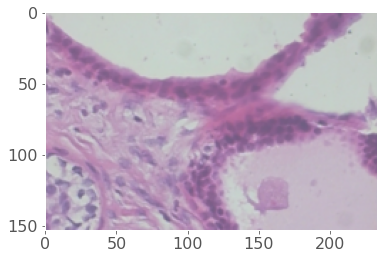

In [96]:
img = X_holdout[3]
plt.imshow(img)
plt.grid(b=None)



In [48]:
# CNN without building
cnn = CNN()
model = keras.models.load_model('../models/saved_model_adadelta.h5')
cnn.model = model
type(model)


tensorflow.python.keras.engine.sequential.Sequential

In [49]:
print(cnn.model.history)

None


In [99]:
y_proba = cnn.model.predict_proba(X_holdout)
y_proba



array([[1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.5311686e-11, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.

In [51]:
# round to 1or 2 decimal place
y_proba2 = np.round(y_proba, 2)
y_proba2

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [52]:
len(y_proba[:,0])
# This gets the index pos of the max
y_hat = np.argmax(y_proba2, axis=-1).reshape(-1,1)

# i also want the prob.
#y_proba2[[y_hat]]
np.indices

# predicted class 
y_hat



array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [53]:
print ('{} predicted M out of {}'.format(sum(y_hat), len(y_hat)))


print ('{} actual M out of {}'.format(sum(y_holdout), len(y_holdout)))
len(y_holdout)

[190] predicted M out of 244
117 actual M out of 244


244

In [102]:
#arr = [[1, 2], [3, 4]]
#mask = [[1],[0]]
 

# There must be a numpy way
#y_holdout[:5]

NameError: name 'float32' is not defined

In [152]:
def mask_2D_by_col(arr2D, arrColToKeep):
    # There must be an array-wise operation to do this but 
    keep = []
    for i, item in enumerate(arr2D):
        #print (item)
        #print (arrColToKeep[i][0])
        #print (arr2D[i][arrColToKeep[i][0]])
        keep.append([arr2D[i][arrColToKeep[i][0]]])
    return keep   
    

In [24]:
# we could also mask for the low proba's and plot it.
winner_proba = mask_2D_by_col(y_proba2, y_hat)
winner_proba

NameError: name 'winner_proba' is not defined

In [154]:
# now the pivot
#pd.pivot_table(g, values='X', rows='Y', cols='Z', margins=False, aggfunc='count')
flattened = [val for sublist in winner_proba for val in sublist]
flattened[:5]

[0.91, 0.84, 0.9, 0.75, 0.65]

In [155]:
from collections import Counter
#Counter(['apple','red','apple','red','red','pear'])
counter_prob = Counter(list(flattened))
counter_prob

Counter({0.91: 13,
         0.84: 14,
         0.9: 15,
         0.75: 3,
         0.65: 2,
         0.8: 7,
         0.92: 9,
         0.94: 9,
         0.83: 4,
         0.77: 8,
         0.95: 8,
         0.87: 8,
         0.74: 6,
         0.97: 10,
         0.86: 12,
         0.63: 1,
         0.85: 9,
         0.98: 4,
         0.73: 3,
         0.79: 15,
         0.89: 9,
         0.81: 7,
         0.57: 3,
         0.88: 7,
         0.96: 9,
         0.54: 1,
         0.76: 5,
         0.72: 1,
         0.6: 1,
         0.7: 4,
         0.82: 8,
         0.93: 7,
         0.68: 2,
         0.71: 3,
         0.69: 2,
         0.64: 2,
         0.53: 2,
         0.51: 1,
         0.67: 1,
         0.62: 1,
         0.78: 4,
         0.52: 1,
         0.58: 2,
         0.59: 1})

<BarContainer object of 44 artists>

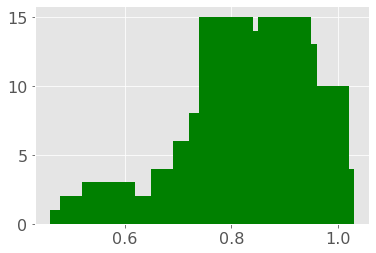

In [156]:
plt.bar(counter_prob.keys(), counter_prob.values(), width=0.1, color='g')

In [ ]:
#histogram


shapes 244 244


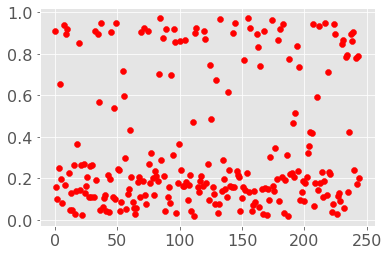

In [157]:
num_predictions = len(y_proba[:,0])
x = np.linspace(0, num_predictions, num=num_predictions)

print ('shapes {} {}'.format(len(x), num_predictions))
#y = x
fig, ax = plt.subplots()
ax.scatter(x, y_proba[:,0], color='red')

# split into red and blue 

In [158]:
x = np.linspace(0, 1, num=100)
# for each probility in y_proba, x = max proba and color is whether its 
# actually in the B or M col

pos_pred = y_proba[:,1]
neg_pred = y_proba[:,0]
pos_pred[:5]
# initially plot both
# aggregate by counts, in buckets of size 0.1
# fancy trick?  pivot, dict, first bucketize/bin

array([0.0913899 , 0.8402233 , 0.90149134, 0.7513306 , 0.34534928],
      dtype=float32)

y vs y_predictions look like [(0, 0.0913899), (0, 0.8402233), (1, 0.90149134), (1, 0.7513306), (0, 0.34534928), (0, 0.8020739), (1, 0.9195615), (0, 0.058739055), (1, 0.8335416), (0, 0.10498217), (0, 0.08019151), (1, 0.7744914), (1, 0.9505796), (1, 0.8689763), (1, 0.9508604)]


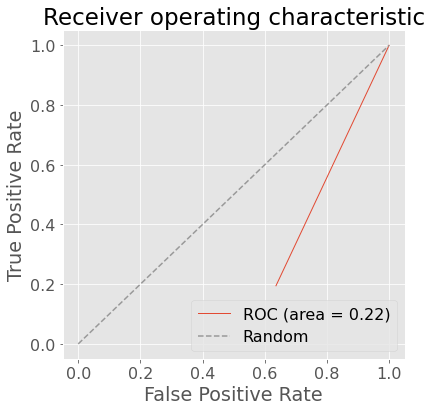

In [159]:
# ROC curve, use py files
plot_roc(X_holdout, y_holdout, cnn.model, 'roc_plot_test')

tensorflow.python.keras.engine.sequential.Sequential

In [35]:

features = ip.features
target = ip.tumor_class_vector
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state=1)


In [12]:
cnn = CNN()
cnn.model = model

In [25]:

score = cnn.model.evaluate(X_holdout, y_holdout, verbose=1)

In [26]:
score

[4.8222170970479, 0.7008197]

AttributeError: 'CNN' object has no attribute 'history'

In [48]:
plot_training_results(history, 10)

In [49]:
type(cnn.history)

tensorflow.python.keras.callbacks.History

In [45]:
cnn.fit(X_train, X_test, y_train, y_test)
cnn.load_and_featurize_data()
cnn.fit_model( batch_size=batch_size, epochs=nb_epoch, verbose=1, data_augmentation=True)

What do X_train, X_test, y_train, y_test look like (1610, 153, 234, 3) (403, 153, 234, 3) (1610,) (403,)
How many train ben/malig 1120 out of total 1610
How many test ben/malig 270 out of total 403
X_train shape: (1610, 153, 234, 3)
1610 train samples
403 test samples
Epoch 1/10
51/51 [==============================] - 289s 6s/step - accuracy: 0.3043 - loss: 0.8390 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8085
Epoch 2/10
51/51 [==============================] - 297s 6s/step - accuracy: 0.3043 - loss: 0.8315 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8028
Epoch 3/10
51/51 [==============================] - 296s 6s/step - accuracy: 0.3043 - loss: 0.8248 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7972
Epoch 4/10
51/51 [==============================] - 251s 5s/step - accuracy: 0.3043 - loss: 0.8184 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7918
Epoch 5/10
51/51 [=================

In [47]:
cnn.history

In [50]:
plot_training_results(history, 10)

In [51]:

def plot_training_results(history, epochs):
    if history is None:
        return
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

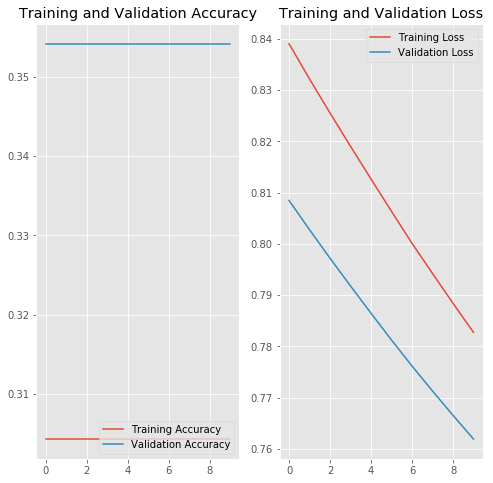

In [52]:
plot_training_results(cnn.history, 10)